In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv(r'D:\Datasets\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=101)

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
pred=dtc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6850393700787402

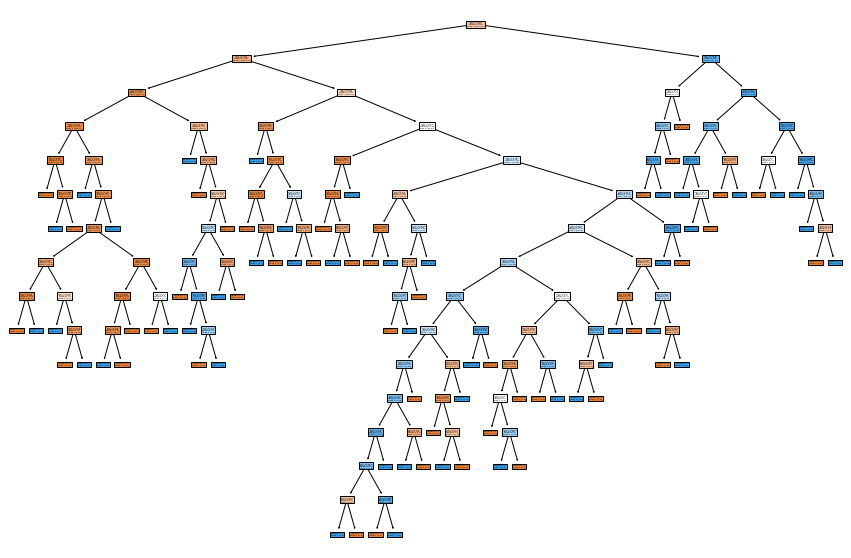

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()

In [15]:
path = dtc.cost_complexity_pruning_path(x_train,y_train)

In [16]:
ccp_alphas,impurities = path.ccp_alphas, path.impurities

In [17]:
ccp_alphas

array([0.        , 0.00170233, 0.00172936, 0.00175097, 0.00182393,
       0.00186094, 0.0018677 , 0.00190131, 0.00192567, 0.00194553,
       0.00194553, 0.00224563, 0.00259403, 0.00259403, 0.00259403,
       0.00276697, 0.00291829, 0.00291829, 0.00291829, 0.00291829,
       0.00291829, 0.00296461, 0.00311284, 0.00321012, 0.00324254,
       0.00337692, 0.00340467, 0.00344807, 0.00344873, 0.00353732,
       0.0035668 , 0.00359174, 0.00363165, 0.00375208, 0.00397211,
       0.00430491, 0.00435498, 0.00437743, 0.00454579, 0.00466926,
       0.00476654, 0.00544747, 0.0054799 , 0.00560259, 0.00569066,
       0.00593461, 0.00600483, 0.0063588 , 0.00658349, 0.00704899,
       0.00802794, 0.02068291, 0.03639964, 0.08442123])

In [18]:
impurities

array([0.        , 0.00340467, 0.00686338, 0.01036533, 0.01401319,
       0.02145694, 0.02519234, 0.02899496, 0.03284631, 0.03673736,
       0.03868288, 0.04766541, 0.05025945, 0.05285348, 0.05544752,
       0.05821449, 0.06113277, 0.06405106, 0.06696935, 0.06988764,
       0.07280593, 0.07577054, 0.07888338, 0.08530361, 0.08854615,
       0.10543073, 0.1088354 , 0.11228347, 0.11918093, 0.12271825,
       0.12628504, 0.12987678, 0.13350843, 0.13726051, 0.14123263,
       0.14984245, 0.15855242, 0.16292985, 0.17202144, 0.1766907 ,
       0.18145724, 0.18690471, 0.19238461, 0.20358978, 0.20928044,
       0.22708426, 0.24509875, 0.25781634, 0.27098332, 0.27803231,
       0.29408819, 0.33545402, 0.37185366, 0.45627489])

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08442122884727504


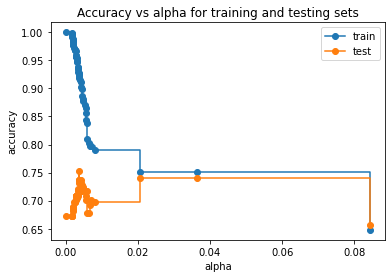

In [21]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# ccp_alpha=0.03

In [25]:
dtc = DecisionTreeClassifier(ccp_alpha=0.03)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03)

In [26]:
dtc.score(x_train,y_train)

0.7509727626459144

In [27]:
dtc.score(x_test,y_test)

0.7401574803149606

[Text(502.20000000000005, 453.0, 'X[1] <= 154.5\ngini = 0.456\nsamples = 514\nvalue = [333, 181]'),
 Text(334.8, 271.8, 'X[7] <= 27.5\ngini = 0.388\nsamples = 433\nvalue = [319, 114]'),
 Text(167.4, 90.59999999999997, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.483\nsamples = 221\nvalue = [131, 90]'),
 Text(669.6, 271.8, 'gini = 0.286\nsamples = 81\nvalue = [14, 67]')]

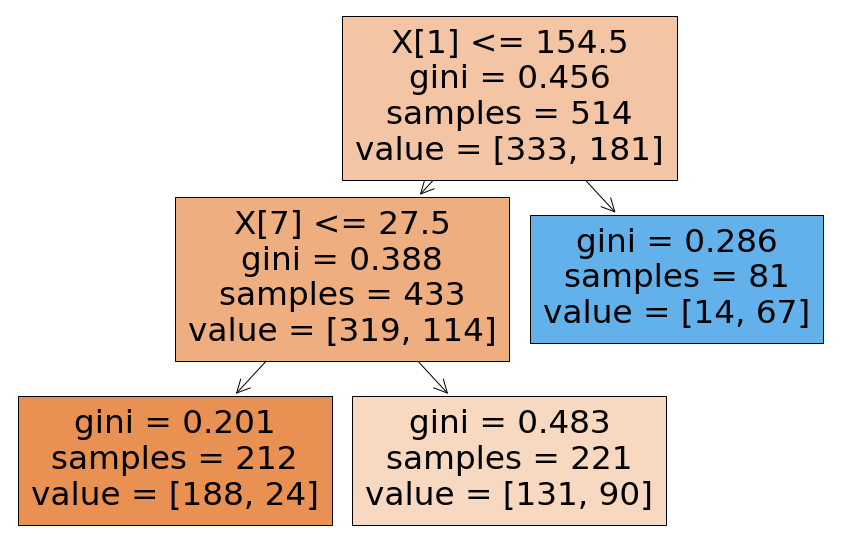

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)